In [9]:
from alphagenome import colab_utils
from alphagenome.data import gene_annotation, genome, track_data, transcript
from alphagenome.models import dna_client
from alphagenome.visualization import plot_components
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from io import StringIO
from alphagenome.data import genome
from alphagenome.models import dna_client, variant_scorers
import pandas as pd
from tqdm import tqdm


In [ ]:
from dotenv import load_dotenv
import os

load_dotenv() 
api_key = os.getenv("ALPHAGENOME_API_KEY")
api_key

dna_model = dna_client.create(api_key)
dna_model

In [14]:
df = pd.read_csv("test_data/1.vep_anno.spliceai.subset_high.vcf", sep="\t", comment="#", header=None)
df = df.iloc[:, :5]  # keep CHROM, POS, ID, REF, ALT
df.columns = ["CHROM", "POS", "ID", "REF", "ALT"]

df

,CHROM,POS,ID,REF,ALT
0,chr1,22598144,.,C,A
1,chr1,159302658,.,G,A
2,chr1,228335304,.,T,G
3,chr2,232487717,.,A,C
4,chr3,50193257,.,G,A
5,chr3,52519183,.,A,C
6,chr3,130716396,.,C,T
7,chr3,142540904,.,C,T
8,chr4,168101684,.,G,A
9,chr5,156677,.,G,T


In [ ]:
# Make variant_id like chr3_58394738_A_T_b38
df["variant_id"] = df.apply(lambda row: f"{row['CHROM']}_{row['POS']}_{row['REF']}_{row['ALT']}_b38", axis=1)

# Reorder columns
df = df[["variant_id", "CHROM", "POS", "REF", "ALT"]]
df

,variant_id,CHROM,POS,REF,ALT
0,chr1_22598144_C_A_b38,chr1,22598144,C,A
1,chr1_159302658_G_A_b38,chr1,159302658,G,A
2,chr1_228335304_T_G_b38,chr1,228335304,T,G
3,chr2_232487717_A_C_b38,chr2,232487717,A,C
4,chr3_50193257_G_A_b38,chr3,50193257,G,A
5,chr3_52519183_A_C_b38,chr3,52519183,A,C
6,chr3_130716396_C_T_b38,chr3,130716396,C,T
7,chr3_142540904_C_T_b38,chr3,142540904,C,T
8,chr4_168101684_G_A_b38,chr4,168101684,G,A
9,chr5_156677_G_T_b38,chr5,156677,G,T


In [16]:
vcf = df

In [172]:
required_columns = ['variant_id', 'CHROM', 'POS', 'REF', 'ALT']
for column in required_columns:
  if column not in vcf.columns:
    raise ValueError(f'VCF file is missing required column: {column}.')

organism = 'human'  # @param ["human", "mouse"] {type:"string"}

# @markdown Specify length of sequence around variants to predict:
sequence_length = '1MB'  # @param ["2KB", "16KB", "100KB", "500KB", "1MB"] { type:"string" }
sequence_length = dna_client.SUPPORTED_SEQUENCE_LENGTHS[
    f'SEQUENCE_LENGTH_{sequence_length}'
]

# @markdown Specify which scorers to use to score your variants:
score_rna_seq = True  # @param { type: "boolean"}
score_cage = True  # @param { type: "boolean" }
score_procap = True  # @param { type: "boolean" }
score_atac = True  # @param { type: "boolean" }
score_dnase = True  # @param { type: "boolean" }
score_chip_histone = True  # @param { type: "boolean" }
score_chip_tf = True  # @param { type: "boolean" }
score_polyadenylation = True  # @param { type: "boolean" }
score_splice_sites = True  # @param { type: "boolean" }
score_splice_site_usage = True  # @param { type: "boolean" }
score_splice_junctions = True  # @param { type: "boolean" }

# @markdown Other settings:
download_predictions = False  # @param { type: "boolean" }

# Parse organism specification.
organism_map = {
    'human': dna_client.Organism.HOMO_SAPIENS,
    'mouse': dna_client.Organism.MUS_MUSCULUS,
}
organism = organism_map[organism]

# Parse scorer specification.
scorer_selections = {
    'rna_seq': score_rna_seq,
    'cage': score_cage,
    'procap': score_procap,
    'atac': score_atac,
    'dnase': score_dnase,
    'chip_histone': score_chip_histone,
    'chip_tf': score_chip_tf,
    'polyadenylation': score_polyadenylation,
    'splice_sites': score_splice_sites,
    'splice_site_usage': score_splice_site_usage,
    'splice_junctions': score_splice_junctions,
}

all_scorers = variant_scorers.RECOMMENDED_VARIANT_SCORERS
selected_scorers = [
    all_scorers[key]
    for key in all_scorers
    if scorer_selections.get(key.lower(), False)
]

# Remove any scorers or output types that are not supported for the chosen organism.
unsupported_scorers = [
    scorer
    for scorer in selected_scorers
    if (
        organism.value
        not in variant_scorers.SUPPORTED_ORGANISMS[scorer.base_variant_scorer]
    )
    | (
        (scorer.requested_output == dna_client.OutputType.PROCAP)
        & (organism == dna_client.Organism.MUS_MUSCULUS)
    )
]
if len(unsupported_scorers) > 0:
  print(
      f'Excluding {unsupported_scorers} scorers as they are not supported for'
      f' {organism}.'
  )
  for unsupported_scorer in unsupported_scorers:
    selected_scorers.remove(unsupported_scorer)


# Score variants in the VCF file.
results = []

for i, vcf_row in tqdm(vcf.iterrows(), total=len(vcf)):
  variant = genome.Variant(
      chromosome=str(vcf_row.CHROM),
      position=int(vcf_row.POS),
      reference_bases=vcf_row.REF,
      alternate_bases=vcf_row.ALT,
      name=vcf_row.variant_id,
  )
  interval = variant.reference_interval.resize(sequence_length)

  variant_scores = dna_model.score_variant(
      interval=interval,
      variant=variant,
      variant_scorers=selected_scorers,
      organism=organism,
  )
  results.append(variant_scores)

df_scores = variant_scorers.tidy_scores(results)

if download_predictions:
  df_scores.to_csv('variant_scores.csv', index=False)

df_scores

100%|██████████| 44/44 [02:05<00:00,  2.85s/it]


,variant_id,scored_interval,gene_id,gene_name,gene_type,gene_strand,junction_Start,junction_End,output_type,variant_scorer,...,track_strand,Assay title,ontology_curie,biosample_name,biosample_type,transcription_factor,histone_mark,gtex_tissue,raw_score,quantile_score
0,chr1:22598144:C>A,chr1:22073856-23122432:.,None,None,None,None,None,None,ATAC,"CenterMaskScorer(requested_output=ATAC, width=...",...,.,ATAC-seq,CL:0000084,T-cell,primary_cell,NaN,NaN,NaN,-0.006562,-0.312224
1,chr1:22598144:C>A,chr1:22073856-23122432:.,None,None,None,None,None,None,ATAC,"CenterMaskScorer(requested_output=ATAC, width=...",...,.,ATAC-seq,CL:0000100,motor neuron,in_vitro_differentiated_cells,NaN,NaN,NaN,-0.014252,-0.373276
2,chr1:22598144:C>A,chr1:22073856-23122432:.,None,None,None,None,None,None,ATAC,"CenterMaskScorer(requested_output=ATAC, width=...",...,.,ATAC-seq,CL:0000236,B cell,primary_cell,NaN,NaN,NaN,-0.002487,-0.160114
3,chr1:22598144:C>A,chr1:22073856-23122432:.,None,None,None,None,None,None,ATAC,"CenterMaskScorer(requested_output=ATAC, width=...",...,.,ATAC-seq,CL:0000623,natural killer cell,primary_cell,NaN,NaN,NaN,-0.001885,-0.160114
4,chr1:22598144:C>A,chr1:22073856-23122432:.,None,None,None,None,None,None,ATAC,"CenterMaskScorer(requested_output=ATAC, width=...",...,.,ATAC-seq,CL:0000624,"CD4-positive, alpha-beta T cell",primary_cell,NaN,NaN,NaN,-0.005579,-0.291254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888848,chrX:52867886:C>T,chrX:52343598-53392174:.,ENSG00000171402,XAGE3,protein_coding,-,52867141,52867885,SPLICE_JUNCTIONS,SpliceJunctionScorer(),...,.,NaN,NaN,NaN,NaN,NaN,NaN,,0.641602,0.998608
888849,chrX:52867886:C>T,chrX:52343598-53392174:.,ENSG00000171402,XAGE3,protein_coding,-,52867141,52867885,SPLICE_JUNCTIONS,SpliceJunctionScorer(),...,.,NaN,NaN,NaN,NaN,NaN,NaN,,0.631348,0.998575
888850,chrX:52867886:C>T,chrX:52343598-53392174:.,ENSG00000171402,XAGE3,protein_coding,-,52867141,52867885,SPLICE_JUNCTIONS,SpliceJunctionScorer(),...,.,NaN,NaN,NaN,NaN,NaN,NaN,,0.568848,0.998438
888851,chrX:52867886:C>T,chrX:52343598-53392174:.,ENSG00000171402,XAGE3,protein_coding,-,52867141,52867885,SPLICE_JUNCTIONS,SpliceJunctionScorer(),...,.,NaN,NaN,NaN,NaN,NaN,NaN,Skin_Not_Sun_Exposed_Suprapubic,0.365234,0.997347


In [103]:
df_scores["gtex_tissue"].unique()

array([nan, '', 'Cells_EBV-transformed_lymphocytes',
       'Cells_Cultured_fibroblasts', 'Pituitary', 'Cervix_Endocervix',
       'Testis', 'Stomach', 'Ovary', 'Uterus', 'Vagina', 'Liver',
       'Pancreas', 'Colon_Transverse', 'Colon_Sigmoid',
       'Small_Intestine_Terminal_Ileum', 'Kidney_Cortex', 'Bladder',
       'Kidney_Medulla', 'Nerve_Tibial', 'Artery_Aorta',
       'Artery_Coronary', 'Brain_Cortex', 'Brain_Caudate_basal_ganglia',
       'Brain_Putamen_basal_ganglia', 'Brain_Amygdala',
       'Brain_Nucleus_accumbens_basal_ganglia', 'Brain_Hypothalamus',
       'Brain_Hippocampus', 'Brain_Cerebellum', 'Brain_Substantia_nigra',
       'Thyroid', 'Spleen', 'Adipose_Subcutaneous',
       'Brain_Cerebellar_Hemisphere', 'Prostate', 'Adrenal_Gland',
       'Fallopian_Tube', 'Skin_Sun_Exposed_Lower_leg',
       'Esophagus_Gastroesophageal_Junction', 'Esophagus_Muscularis',
       'Minor_Salivary_Gland', 'Brain_Spinal_cord_cervical_c-1',
       'Heart_Left_Ventricle', 'Heart_Atrial_A

In [163]:
skin_scores = df_scores[df_scores["gtex_tissue"].str.contains("skin", case=False, na=False)]
high_impact = df_scores[(df_scores["quantile_score"].abs() > 0.95)]
high_impact["output_type"].unique()

array(['CAGE', 'RNA_SEQ', 'SPLICE_SITES', 'SPLICE_SITE_USAGE',
       'SPLICE_JUNCTIONS', 'CHIP_HISTONE', 'CHIP_TF', 'PROCAP', 'ATAC',
       'DNASE'], dtype=object)

In [169]:
axl_high = high_impact[high_impact["gene_name"] == "AXL"]
axl_high["gtex_tissue"].unique()

array(['', nan, 'Cells_EBV-transformed_lymphocytes',
       'Cells_Cultured_fibroblasts', 'Pituitary', 'Cervix_Endocervix',
       'Testis', 'Stomach', 'Ovary', 'Uterus', 'Vagina', 'Liver',
       'Pancreas', 'Colon_Transverse', 'Colon_Sigmoid',
       'Small_Intestine_Terminal_Ileum', 'Kidney_Cortex', 'Bladder',
       'Kidney_Medulla', 'Nerve_Tibial', 'Artery_Aorta',
       'Artery_Coronary', 'Brain_Cortex', 'Brain_Caudate_basal_ganglia',
       'Brain_Putamen_basal_ganglia', 'Brain_Amygdala',
       'Brain_Nucleus_accumbens_basal_ganglia', 'Brain_Hypothalamus',
       'Brain_Hippocampus', 'Brain_Cerebellum', 'Brain_Substantia_nigra',
       'Thyroid', 'Spleen', 'Adipose_Subcutaneous',
       'Brain_Cerebellar_Hemisphere', 'Prostate', 'Adrenal_Gland',
       'Fallopian_Tube', 'Skin_Sun_Exposed_Lower_leg',
       'Esophagus_Gastroesophageal_Junction', 'Esophagus_Muscularis',
       'Minor_Salivary_Gland', 'Brain_Spinal_cord_cervical_c-1',
       'Heart_Left_Ventricle', 'Heart_Atrial_A

In [110]:
sorted_scores = high_ab_skin_scores.sort_values("quantile_score")

# Select bottom 10 and top 10
bottom10 = sorted_scores.head(10)
top10 = sorted_scores.tail(10)

# Combine for plotting
combined = pd.concat([bottom10, top10])

# Make sure it's ordered for plotting
combined = combined.sort_values("quantile_score")

import pandas as pd
import matplotlib.pyplot as plt

# Ensure quantile is numeric
combined["quantile_score"] = pd.to_numeric(combined["quantile_score"], errors="coerce")
combined = combined.dropna(subset=["quantile_score"])

# Sort again for clean plot
combined = combined.sort_values("quantile_score")
combined.head()

,variant_id,scored_interval,gene_id,gene_name,gene_type,gene_strand,junction_Start,junction_End,output_type,variant_scorer,...,track_strand,Assay title,ontology_curie,biosample_name,biosample_type,transcription_factor,histone_mark,gtex_tissue,raw_score,quantile_score
331539,chr9:137551980:T>G,chr9:137027692-138076268:.,ENSG00000182154,MRPL41,protein_coding,+,None,None,RNA_SEQ,GeneMaskLFCScorer(requested_output=RNA_SEQ),...,.,polyA plus RNA-seq,UBERON:0036149,suprapubic skin,tissue,NaN,NaN,Skin_Not_Sun_Exposed_Suprapubic,-0.399392,-0.99998
330159,chr9:137551980:T>G,chr9:137027692-138076268:.,ENSG00000182154,MRPL41,protein_coding,+,None,None,RNA_SEQ,GeneMaskLFCScorer(requested_output=RNA_SEQ),...,.,polyA plus RNA-seq,UBERON:0004264,lower leg skin,tissue,NaN,NaN,Skin_Sun_Exposed_Lower_leg,-0.388926,-0.99998
488625,chr14:50664447:C>T,chr14:50140159-51188735:.,ENSG00000269906,ENSG00000269906,lncRNA,-,None,None,RNA_SEQ,GeneMaskLFCScorer(requested_output=RNA_SEQ),...,.,polyA plus RNA-seq,UBERON:0036149,suprapubic skin,tissue,NaN,NaN,Skin_Not_Sun_Exposed_Suprapubic,-0.299832,-0.99998
839259,chr20:7934479:C>T,chr20:7410191-8458767:.,ENSG00000101323,HAO1,protein_coding,-,None,None,RNA_SEQ,GeneMaskLFCScorer(requested_output=RNA_SEQ),...,.,polyA plus RNA-seq,UBERON:0036149,suprapubic skin,tissue,NaN,NaN,Skin_Not_Sun_Exposed_Suprapubic,-0.339324,-0.99998
839052,chr20:7934479:C>T,chr20:7410191-8458767:.,ENSG00000101323,HAO1,protein_coding,-,None,None,RNA_SEQ,GeneMaskLFCScorer(requested_output=RNA_SEQ),...,.,polyA plus RNA-seq,UBERON:0004264,lower leg skin,tissue,NaN,NaN,Skin_Sun_Exposed_Lower_leg,-0.322233,-0.99998


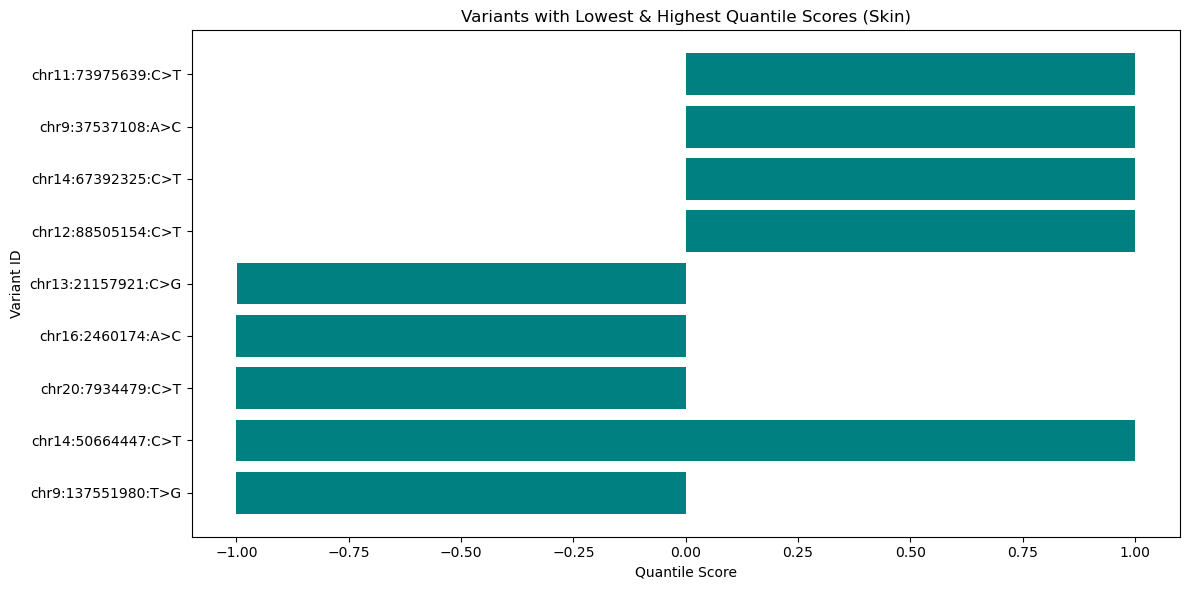

In [118]:
combined["quantile_score"] = pd.to_numeric(combined["quantile_score"], errors="coerce")

# Drop any NaNs in quantile_score
combined = combined.dropna(subset=["quantile_score"])

# Make sure IDs are strings
combined["variant_id"] = combined["variant_id"].astype(str)

plot_data = combined.dropna(subset=["variant_id", "quantile_score"])

plt.figure(figsize=(12, 6))
plt.barh(
    y=plot_data["variant_id"],
    width=plot_data["quantile_score"],
    color="teal"
)
plt.xlabel("Quantile Score")
plt.ylabel("Variant ID")
plt.title("Variants with Lowest & Highest Quantile Scores (Skin)")
plt.tight_layout()
plt.show()

In [37]:
gtf = pd.read_feather(
    'https://storage.googleapis.com/alphagenome/reference/gencode/'
    'hg38/gencode.v46.annotation.gtf.gz.feather'
)

# Filter to protein-coding genes and highly supported transcripts.
gtf_transcript = gene_annotation.filter_transcript_support_level(
    gene_annotation.filter_protein_coding(gtf), ['1']
)

# Extractor for identifying transcripts in a region.
transcript_extractor = transcript.TranscriptExtractor(gtf_transcript)

# Also define an extractor that fetches only the longest transcript per gene.
gtf_longest_transcript = gene_annotation.filter_to_longest_transcript(
    gtf_transcript
)
longest_transcript_extractor = transcript.TranscriptExtractor(
    gtf_longest_transcript
)

In [159]:
variant_string = 'chrX:52867886:C>T'
variant = genome.Variant.from_str(variant_string)
variant

Variant(chromosome='chrX', position=52867886, reference_bases='C', alternate_bases='T', name='')

In [173]:
ontology_terms = [
    'UBERON:0036149' #skin
]

output = dna_model.predict_variant(
    interval=interval,
    variant=variant,
    requested_outputs={
        dna_client.OutputType.RNA_SEQ,
        dna_client.OutputType.SPLICE_SITES,
        dna_client.OutputType.SPLICE_SITE_USAGE,
        dna_client.OutputType.SPLICE_JUNCTIONS,
        dna_client.OutputType.CAGE,
        
    },
    ontology_terms=ontology_terms,
)

In [87]:
longest_transcripts = longest_transcript_extractor.extract(interval)
longest_transcripts

[Transcript(exons=[Interval(chromosome='chrX', start=52369020, end=52369214, strand='+', name=''), Interval(chromosome='chrX', start=52370006, end=52370095, strand='+', name=''), Interval(chromosome='chrX', start=52370566, end=52370672, strand='+', name=''), Interval(chromosome='chrX', start=52372543, end=52372669, strand='+', name=''), Interval(chromosome='chrX', start=52375568, end=52375680, strand='+', name='')], cds=[Interval(chromosome='chrX', start=52370014, end=52370095, strand='+', name=''), Interval(chromosome='chrX', start=52370566, end=52370672, strand='+', name=''), Interval(chromosome='chrX', start=52372543, end=52372669, strand='+', name=''), Interval(chromosome='chrX', start=52375568, end=52375588, strand='+', name='')], start_codon=[Interval(chromosome='chrX', start=52370014, end=52370017, strand='+', name='')], stop_codon=[Interval(chromosome='chrX', start=52375588, end=52375591, strand='+', name='')], transcript_id='ENST00000286049.3', gene_id='ENSG00000155622.7', pro

In [ ]:
output.reference

Output(atac=TrackData(values=array([], shape=(1048576, 0), dtype=float32), metadata=Empty DataFrame
Columns: [name, strand]
Index: [], resolution=1, interval=Interval(chromosome='chrX', start=52343598, end=53392174, strand='.', name=''), uns=None), cage=TrackData(values=array([], shape=(1048576, 0), dtype=float32), metadata=Empty DataFrame
Columns: [name, strand]
Index: [], resolution=1, interval=Interval(chromosome='chrX', start=52343598, end=53392174, strand='.', name=''), uns=None), dnase=TrackData(values=array([[0.0279541 ],
       [0.06835938],
       [0.04833984],
       ...,
       [0.125     ],
       [0.00927734],
       [0.04345703]], dtype=float32), metadata=                       name strand Assay title  ontology_curie  \
0  UBERON:0036149 DNase-seq      .   DNase-seq  UBERON:0036149   

    biosample_name biosample_type biosample_life_stage data_source endedness  \
0  suprapubic skin         tissue                adult      encode    paired   

   genetically_modified  
0 

In [ ]:
transcripts = transcript_extractor.extract(interval)

ref_output = output.reference
alt_output = output.alternate

ref_output.chip_histone

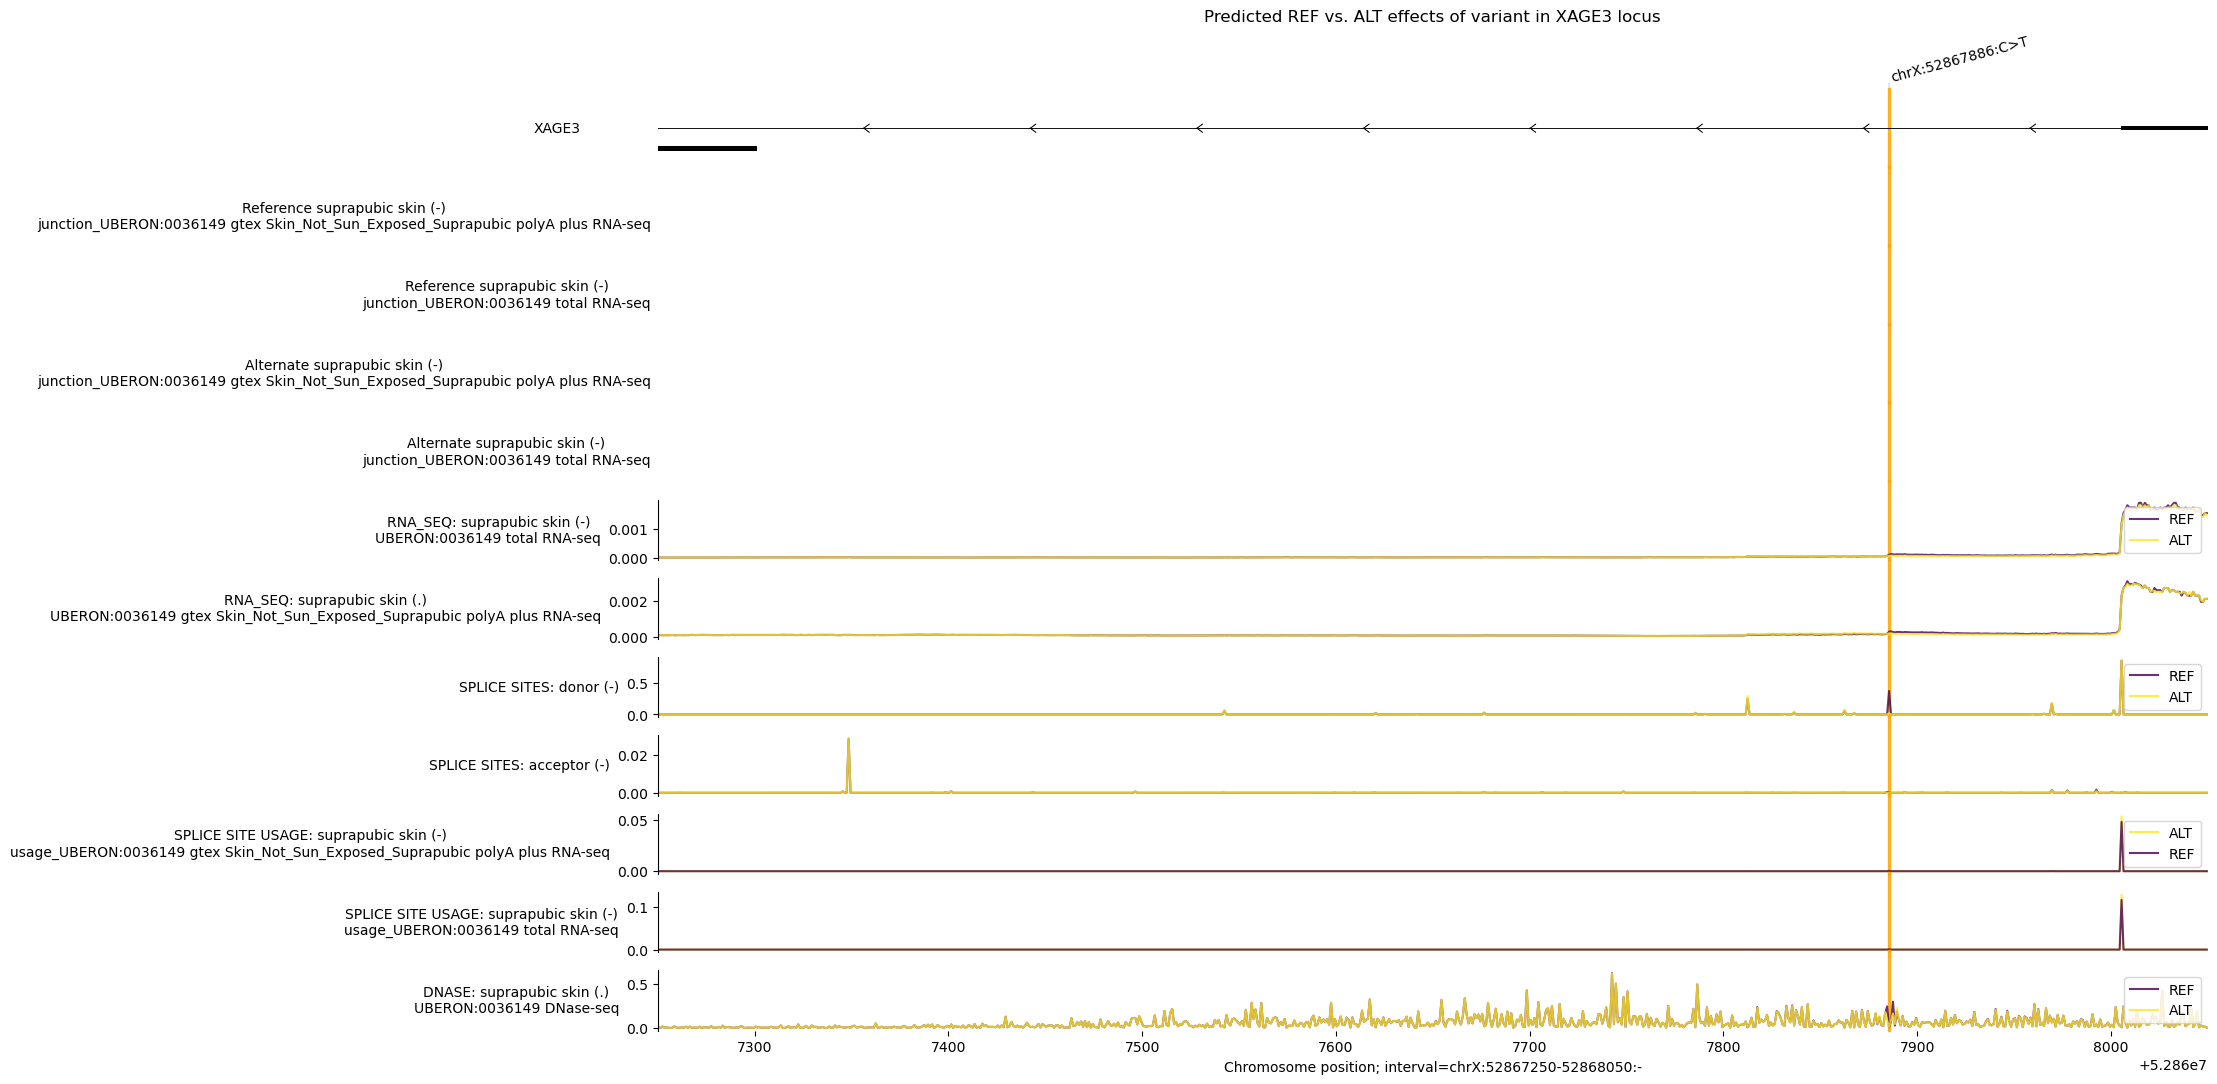

In [171]:
interval = genome.Interval(
    chromosome='chrX',
    start=52867250,
    end=52868050,
    strand='-',
    name='XAGE3_focused'
)

# Then run your existing plot
plot = plot_components.plot(
    [
        plot_components.TranscriptAnnotation(transcripts),
        plot_components.Sashimi(
            ref_output.splice_junctions.filter_to_strand('-'),
            ylabel_template='Reference {biosample_name} ({strand})\n{name}',
        ),
        plot_components.Sashimi(
            alt_output.splice_junctions.filter_to_strand('-'),
            ylabel_template='Alternate {biosample_name} ({strand})\n{name}',
        ),
        plot_components.OverlaidTracks(
            tdata={
                'REF': ref_output.rna_seq.filter_to_nonpositive_strand(),
                'ALT': alt_output.rna_seq.filter_to_nonpositive_strand(),
            },
            ylabel_template='RNA_SEQ: {biosample_name} ({strand})\n{name}',
        ),
        plot_components.OverlaidTracks(
            tdata={
                'REF': ref_output.splice_sites.filter_to_nonpositive_strand(),
                'ALT': alt_output.splice_sites.filter_to_nonpositive_strand(),
            },
            ylabel_template='SPLICE SITES: {name} ({strand})',
        ),
        plot_components.OverlaidTracks(
            tdata={
                'REF': ref_output.splice_site_usage.filter_to_nonpositive_strand(),
                'ALT': alt_output.splice_site_usage.filter_to_nonpositive_strand(),
            },
            ylabel_template='SPLICE SITE USAGE: {biosample_name} ({strand})\n{name}',
        ),
        plot_components.OverlaidTracks(
            tdata={
                'REF': ref_output.cage.filter_to_nonpositive_strand(),
                'ALT': alt_output.cage.filter_to_nonpositive_strand(),
            },
            ylabel_template='CAGE: {biosample_name} ({strand})\n{name}',
        ),
        plot_components.OverlaidTracks(
            tdata={
                'REF': ref_output.dnase.filter_to_nonpositive_strand(),
                'ALT': alt_output.dnase.filter_to_nonpositive_strand(),
            },
            ylabel_template='DNASE: {biosample_name} ({strand})\n{name}',
        ),
        plot_components.OverlaidTracks(
            tdata={
                'REF': ref_output.atac.filter_to_nonpositive_strand(),
                'ALT': alt_output.atac.filter_to_nonpositive_strand(),
            },
            ylabel_template='ATAC: {biosample_name} ({strand})\n{name}',
        ),
    ],
    interval=interval,
    annotations=[plot_components.VariantAnnotation([variant])],
    title='Predicted REF vs. ALT effects of variant in XAGE3 locus'
)